Created by Errahum https://github.com/Errahum

Linkedin: https://www.linkedin.com/in/erahum/

Mail: mail@erahum.com

Youtube: https://www.youtube.com/@Errahum

# data processing

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from pathlib import Path
import importlib.util

# parents[2] refers to the grandparent directory (two levels up)
def dynamic_import(module_name, parent_levels_up=2):
    # Get the absolute path to the parent directory
    current_dir = Path.cwd()
    parent_dir = current_dir.parents[parent_levels_up]
    
    # Define the path to the module
    file_path = parent_dir / 'src' / 'data_management' / f'{module_name}.py'
    data_path = parent_dir / 'data'
    
    # Dynamically import the module
    spec = importlib.util.spec_from_file_location(module_name, str(file_path))
    module = importlib.util.module_from_spec(spec)
    sys.modules[module_name] = module
    spec.loader.exec_module(module)
    
    return module, data_path

# Import the notebook_data_tools module
notebook_data_tools, data_path = dynamic_import('notebook_data_tools')

# Use the imported functions
impute_df = notebook_data_tools.impute_df
delete_duplicates = notebook_data_tools.delete_duplicates
log_return_df = notebook_data_tools.log_return_df

In [36]:
CL = pd.read_csv(data_path / 'extract_transform' / 'CL=F_1d.csv')
CL.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-01-04,79.629997,81.680000,79.629997,81.510002,81.510002,263542
1,1,2010-01-05,81.629997,82.000000,80.949997,81.769997,81.769997,258887
2,2,2010-01-06,81.430000,83.519997,80.849998,83.180000,83.180000,370059
3,3,2010-01-07,83.199997,83.360001,82.260002,82.660004,82.660004,246632
4,4,2010-01-08,82.650002,83.470001,81.800003,82.750000,82.750000,310377


In [37]:
CL = CL.drop(['Unnamed: 0'], axis=1)
CL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,79.629997,81.680000,79.629997,81.510002,81.510002,263542
1,2010-01-05,81.629997,82.000000,80.949997,81.769997,81.769997,258887
2,2010-01-06,81.430000,83.519997,80.849998,83.180000,83.180000,370059
3,2010-01-07,83.199997,83.360001,82.260002,82.660004,82.660004,246632
4,2010-01-08,82.650002,83.470001,81.800003,82.750000,82.750000,310377


In [38]:
CL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3694 non-null   object 
 1   Open       3694 non-null   float64
 2   High       3694 non-null   float64
 3   Low        3694 non-null   float64
 4   Close      3694 non-null   float64
 5   Adj Close  3694 non-null   float64
 6   Volume     3694 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 202.1+ KB


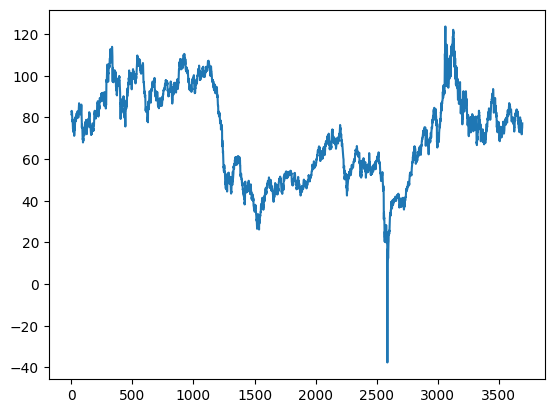

In [39]:
plt.plot(CL['Close'])

In [40]:
merged_df = pd.read_csv(data_path / 'processed' / 'merged_df.csv')

merged_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Name,Datetime
0,2010-01-04,3288.0,3311.0,3245.0,3256.0,3256.0,6405.0,CC=F,NaN
1,2010-01-05,3250.0,3333.0,3246.0,3321.0,3321.0,6831.0,CC=F,NaN
2,2010-01-06,3300.0,3306.0,3272.0,3292.0,3292.0,6481.0,CC=F,NaN
3,2010-01-07,3278.0,3313.0,3257.0,3309.0,3309.0,6957.0,CC=F,NaN
4,2010-01-08,3281.0,3326.0,3281.0,3296.0,3296.0,4606.0,CC=F,NaN


In [41]:
merged_df['Name'].unique()

array(['CC=F', 'CL=F', 'CT=F', 'GC=F', 'HG=F', 'HO=F', 'KC=F', 'MCD=F',
       'NG=F', 'OJ=F', 'PA=F', 'PL=F', 'RB=F', 'SB=F', 'SI=F', 'SPY',
       'ZC=F', 'ZM=F', 'ZS=F', 'ZW=F'], dtype=object)

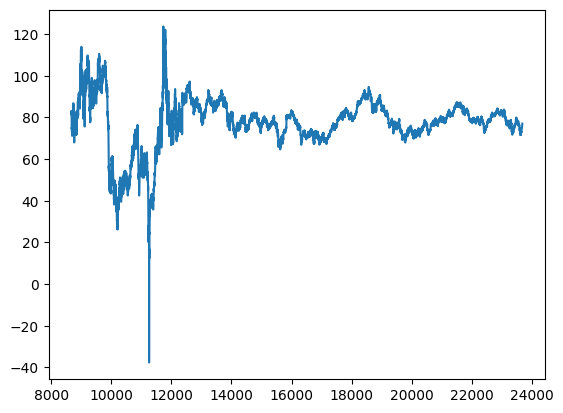

In [42]:
plt.plot(merged_df.loc[merged_df['Name'] == 'CL=F', 'Close'])

In [43]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254496 entries, 0 to 254495
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       72498 non-null   object 
 1   Open       254496 non-null  float64
 2   High       254496 non-null  float64
 3   Low        254496 non-null  float64
 4   Close      254496 non-null  float64
 5   Adj Close  254496 non-null  float64
 6   Volume     254496 non-null  float64
 7   Name       254496 non-null  object 
 8   Datetime   181998 non-null  object 
dtypes: float64(6), object(3)
memory usage: 17.5+ MB


In [44]:
CL['Date'].duplicated().sum()

0

In [50]:
CL.index.duplicated().sum()

0

In [53]:
CL.duplicated().sum()

0

# Stationary

In [45]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
CL['log_return'] = log_return_df(CL['Close'])

<Axes: >

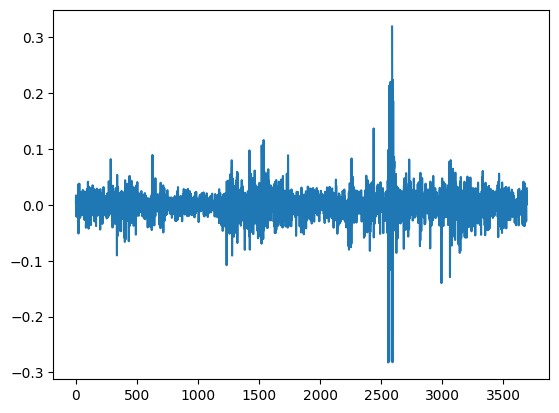

In [47]:
CL['log_return'].plot()

In [48]:
adf = adfuller(CL['log_return'].dropna())

In [49]:
adf

(-10.927148031634982,
 1.0034917144303055e-19,
 24,
 3666,
 {'1%': -3.432135020388135,
  '5%': -2.862328722835932,
  '10%': -2.5671898489444147},
 -16419.37694608866)

p-value: 0.0
p-value is < 0.5

reject the null hypothesis that the time series has a unit root (is not stationary). Therefore, you can conclude that the time series is stationary.